La implementación del **beat spectrum** como se describe en el artículo de Foote (2001) implica varias etapas clave: transformación espectral por ventanas (como FFT o MFCC), construcción de la matriz de similitud entre ventanas, y detección de periodicidades por autocorrelación o suma diagonal. Aunque no muchas librerías ofrecen una función directa llamada “beat spectrum”, sí existen herramientas que permiten implementarlo eficientemente.

Aquí te dejo varias opciones y recursos útiles:

---

### 🧰 **Librerías que puedes usar para implementarlo**

#### 1. **Librosa (Python)**

Muy completa para análisis musical. Puedes realizar fácilmente:

* **STFT / FFT** → `librosa.stft`
* **MFCC** → `librosa.feature.mfcc`
* **Cálculo de matriz de similitud** → `librosa.segment.recurrence_matrix`
* **Autocorrelación** → `scipy.signal.correlate` o funciones propias

```python
import librosa
import numpy as np
import matplotlib.pyplot as plt

y, sr = librosa.load('your_audio.wav')
S = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
similarity = librosa.segment.recurrence_matrix(S.T, metric='cosine', mode='affinity')

# Beat spectrum por suma diagonal
beat_spectrum = [np.sum(np.diag(similarity, k)) for k in range(similarity.shape[0])]
plt.plot(beat_spectrum)
plt.title("Beat Spectrum")
plt.xlabel("Lag")
plt.ylabel("Similarity")
plt.show()
```

#### 2. **Essentia (C++ y Python bindings)**

Librería desarrollada por el Music Technology Group (UPF), orientada al análisis musical profundo. Tiene herramientas de:

* Extracción de características espectrales
* Matriz de similitud
* Autocorrelación

Página: [https://essentia.upf.edu/](https://essentia.upf.edu/)

---

### 📚 Artículos / Implementaciones relevantes

* [Dan Ellis - Beat Spectrum Tools (Matlab)](http://labrosa.ee.columbia.edu/projects/beatspectrum/)
* [Craig Sapp – Music Similarity Measures](https://ccrma.stanford.edu/~craig/) — incluye ideas sobre autocorrelación en audio estructural

---

### ✅ ¿Qué necesitas para implementarlo tú mismo?

1. Dividir el audio en ventanas con solapamiento.
2. Calcular características espectrales (FFT o MFCC).
3. Construir la matriz de similitud usando distancia del coseno.
4. Sumar diagonales de la matriz para obtener el beat spectrum.
5. (Opcional) Repetir en ventanas sucesivas para obtener el **beat spectrogram**.

---


¡Hola! Entiendo que estás interesado en implementar el beat spectrum o encontrar librerías que ya lo hagan. Basándome en la descripción detallada que proporcionaste, el algoritmo implica los siguientes pasos principales:

1.  **Parametrización del audio:** Convertir la señal de audio en una secuencia de vectores de características. Esto se suele hacer mediante el análisis espectral, como la Transformada de Fourier (FFT) aplicada a ventanas de la señal. También se mencionan otras técnicas como MFCC o análisis psicoacústico.
2.  **Cálculo de la similitud entre frames:** Calcular una medida de distancia o similitud entre todos los pares posibles de estos vectores de características. La distancia euclidiana normalizada (coseno del ángulo) es una métrica recomendada ya que es menos sensible a la energía del frame.
3.  **Matriz de similitud:** Organizar estas medidas de similitud en una matriz bidimensional, donde cada elemento $(i, j)$ representa la similitud entre el frame $i$ y el frame $j$.
4.  **Derivación del beat spectrum:** Encontrar las periodicidades en esta matriz de similitud. Esto se puede hacer sumando los valores a lo largo de las diagonales de la matriz (para diferentes "lags" o desplazamientos de tiempo) o calculando la autocorrelación de la matriz de similitud. Los picos en el beat spectrum resultante indicarán las repeticiones rítmicas en el audio.

**Sobre librerías:**

Aunque no puedo buscar en tiempo real librerías específicas, te puedo dar algunas pistas sobre dónde podrías encontrarlas y qué buscar:

* **Librerías de procesamiento de audio en Python:** Python es un lenguaje muy popular para el procesamiento de audio y existen varias librerías potentes que podrían tener funcionalidades relacionadas o que te permitirían implementar los pasos del algoritmo:
    * **Librosa:** Es una librería muy completa para el análisis de audio y música. Aunque no tiene una función directa para el "beat spectrum" como se describe aquí, ofrece muchas herramientas para la extracción de características espectrales (como STFT, MFCC), cálculo de similitud y autocorrelación, que podrías usar para implementar el algoritmo.
    * **Essentia:** Otra librería robusta para el análisis de audio y música, desarrollada en C++ pero con bindings para Python. También ofrece una amplia gama de descriptores de audio y herramientas que podrían ser útiles.
    * **Madmom:** Librería enfocada en la detección de ritmos y beats. Aunque su enfoque principal es la detección de eventos de beat, podría tener módulos o funcionalidades relacionadas con el análisis de periodicidad en la señal.
    * **Scikit-learn:** Si bien no es específica de audio, esta librería de machine learning tiene funciones para el cálculo de distancias (como la distancia euclidiana y el coseno) y para el análisis de matrices que podrían ser útiles en la implementación.
    * **NumPy y SciPy:** Estas librerías fundamentales de Python para computación numérica proporcionan las herramientas necesarias para trabajar con arrays, realizar operaciones matemáticas (como la FFT y la autocorrelación) y construir la matriz de similitud.

* **Términos de búsqueda:** Cuando busques librerías o implementaciones existentes, podrías usar los siguientes términos clave:
    * "Beat spectrum Python"
    * "Self-similarity matrix audio Python"
    * "Rhythm analysis library Python"
    * "Periodicity analysis audio Python"
    * "Audio feature extraction Python"

* **Investigación académica y código asociado:** A menudo, los artículos de investigación en procesamiento de audio publican el código o las implementaciones de los algoritmos que describen. Dado que proporcionaste una referencia a un artículo, buscar si los autores han publicado el código podría ser un buen punto de partida. Plataformas como GitHub o repositorios de investigación podrían contener implementaciones relacionadas.

**Pasos para implementar o encontrar una librería:**

1.  **Investiga las librerías mencionadas:** Explora la documentación y los ejemplos de Librosa, Essentia y Madmom para ver si ofrecen funcionalidades que se alineen con los pasos del algoritmo del beat spectrum.
2.  **Busca implementaciones existentes:** Realiza búsquedas en internet utilizando los términos clave sugeridos. Revisa repositorios de código abierto como GitHub y busca implementaciones de "beat spectrum" o algoritmos relacionados.
3.  **Implementa los pasos individualmente:** Si no encuentras una librería que implemente directamente el beat spectrum, puedes intentar implementar cada paso del algoritmo utilizando las herramientas que ofrecen las librerías de procesamiento de audio y computación numérica. Por ejemplo:
    * Usar Librosa o Essentia para la parametrización del audio (STFT, MFCC, etc.).
    * Usar Scikit-learn o funciones de NumPy/SciPy para calcular la matriz de similitud.
    * Implementar la suma diagonal o la autocorrelación en la matriz de similitud usando NumPy.
4.  **Considera el beat spectrogram:** Si tu objetivo es analizar la variación rítmica en el tiempo, también podrías investigar cómo implementar el beat spectrogram, que implica calcular el beat spectrum en ventanas de tiempo sucesivas.

Espero que esta información te sea útil para comenzar tu búsqueda e implementación del beat spectrum. ¡Mucha suerte con tu proyecto! Si tienes más preguntas a medida que avanzas, no dudes en consultarme.

In [ ]:
audio_path = 'audio\Acordai-70.mp3'

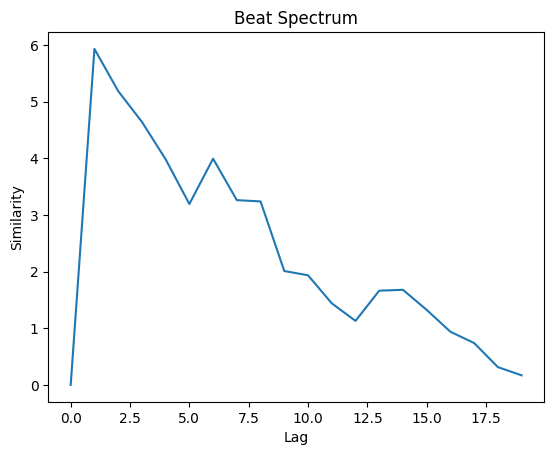

In [6]:
import librosa
import numpy as np
import matplotlib.pyplot as plt

y, sr = librosa.load(audio_path)
S = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
similarity = librosa.segment.recurrence_matrix(S.T, metric='cosine', mode='affinity')

# Beat spectrum por suma diagonal
beat_spectrum = [np.sum(np.diag(similarity, k)) for k in range(similarity.shape[0])]
plt.plot(beat_spectrum)
plt.title("Beat Spectrum")
plt.xlabel("Lag")
plt.ylabel("Similarity")
plt.show()

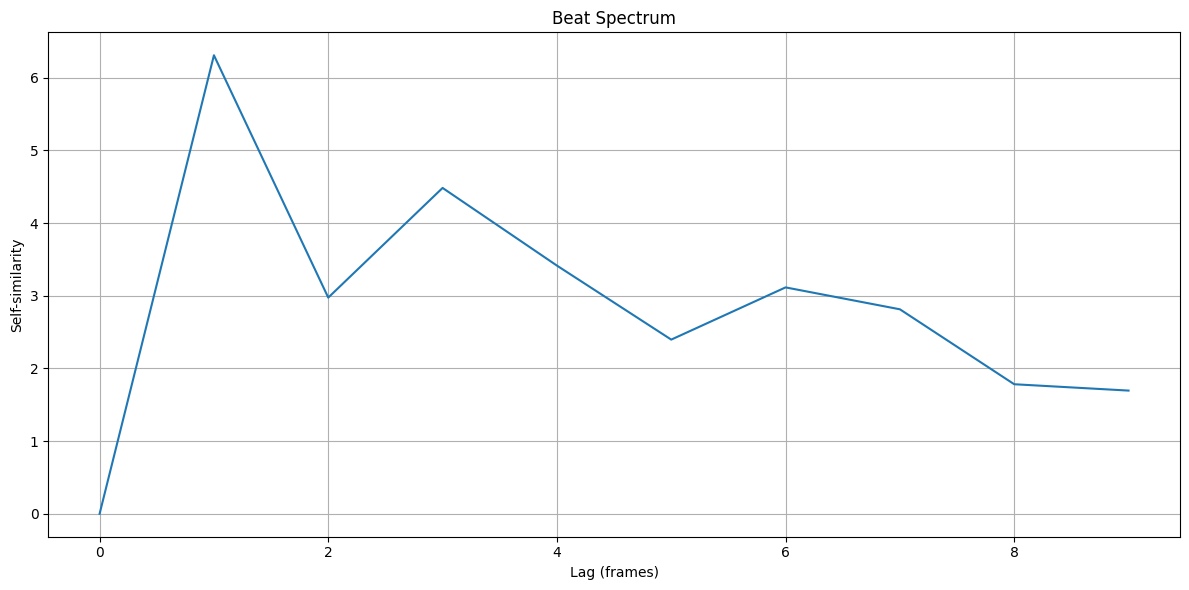

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# 1. Cargar el audio
y, sr = librosa.load(audio_path, sr=None)

# 2. Extraer características (usamos MFCCs)
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)

# 3. Matriz de similitud (usamos distancia coseno)
sim_matrix = librosa.segment.recurrence_matrix(mfcc.T, metric='cosine', mode='affinity', sym=True)

# 4. Calcular el beat spectrum (suma de diagonales superiores)
max_lag = sim_matrix.shape[0] // 2  # Para evitar mucho ruido a largo plazo
beat_spectrum = np.array([np.sum(np.diag(sim_matrix, k)) for k in range(max_lag)])

# 5. Graficar el resultado
plt.figure(figsize=(12, 6))
plt.plot(beat_spectrum)
plt.title("Beat Spectrum")
plt.xlabel("Lag (frames)")
plt.ylabel("Self-similarity")
plt.grid(True)
plt.tight_layout()
plt.show()

c:\Users\sarag\Desktop\TFG\MetronIA\.conda\Lib\site-packages\librosa\feature\spectral.py:2148: UserWarning: Empty filters detected in mel frequency basis. Some channels will produce empty responses. Try increasing your sampling rate (and fmax) or reducing n_mels.
  mel_basis = filters.mel(sr=sr, n_fft=n_fft, **kwargs)


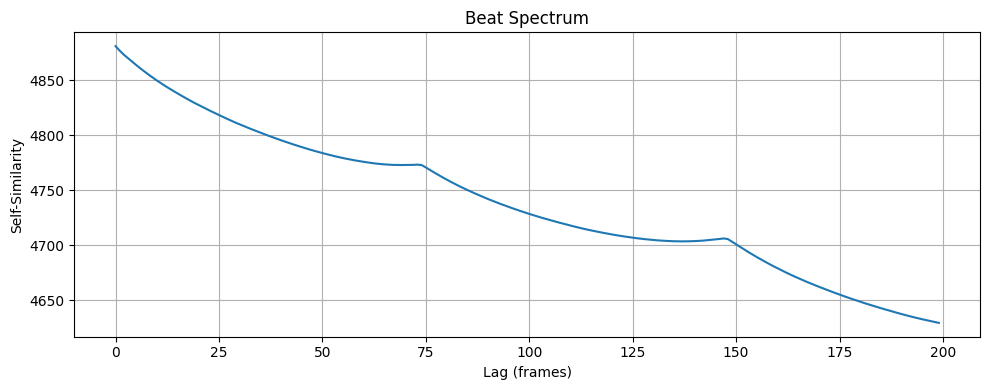

In [4]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# 1. Cargar el audio
y, sr = librosa.load(audio_path, sr=None)

# 2. Extraer características: MFCC
n_fft = 512  # Tamaño de ventana
hop_length = 256  # Salto entre ventanas
mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20, hop_length=hop_length, n_fft=n_fft)

# Transponer para que cada fila sea un frame
mfcc = mfcc.T

# 3. Calcular matriz de similitud usando la distancia del coseno (convertida a similitud)
# La matriz de distancia es de forma (n_frames, n_frames)
distance_matrix = cdist(mfcc, mfcc, metric='cosine')
similarity_matrix = 1 - distance_matrix  # Similaridad = 1 - distancia del coseno

# 4. Calcular beat spectrum sumando diagonales superiores
max_lag = 200  # Límite superior para los retardos (puedes ajustarlo)
beat_spectrum = np.array([np.sum(np.diag(similarity_matrix, k=lag)) for lag in range(max_lag)])

# 5. Graficar el beat spectrum
plt.figure(figsize=(10, 4))
plt.plot(beat_spectrum)
plt.title("Beat Spectrum")
plt.xlabel("Lag (frames)")
plt.ylabel("Self-Similarity")
plt.grid()
plt.tight_layout()
plt.show()
